In [1]:
pip install surprise


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import Dataset 
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate

In [3]:
data = Dataset.load_from_file('ratings_small.csv', reader=Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1))

In [4]:
algo_pmf = SVD(biased=False)
algo_user_based = KNNBasic(sim_options={'user_based': True})
algo_item_based = KNNBasic(sim_options={'user_based': False})

In [5]:
results = cross_validate(algo_pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
rmse_pmf = results['test_rmse'].mean()
mae_pmf = results['test_mae'].mean()
print("-----------------------------------------------------------------------------")
print("PMF")
print("RMSE", rmse_pmf)
print("MAE", mae_pmf)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0117  1.0057  1.0107  1.0034  1.0039  1.0071  0.0035  
MAE (testset)     0.7806  0.7779  0.7809  0.7772  0.7754  0.7784  0.0021  
Fit time          0.39    0.39    0.38    0.39    0.38    0.39    0.00    
Test time         0.04    0.04    0.07    0.03    0.07    0.05    0.02    
-----------------------------------------------------------------------------
PMF
RMSE 1.0070845427619513
MAE 0.7784030940328064


In [6]:
results = cross_validate(algo_user_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
rmse_user = results['test_rmse'].mean()
mae_user = results['test_mae'].mean()
print("-----------------------------------------------------------------------------")
print("User-based")
print("RMSE", rmse_user)
print("MAE", mae_user)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9743  0.9549  0.9682  0.9756  0.9705  0.9687  0.0074  
MAE (testset)     0.7458  0.7331  0.7469  0.7511  0.7452  0.7444  0.0060  
Fit time          0.03    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.48    0.43    0.47    0.48    0.47    0.46    0.02    
-----------------------------------------------------------------------------
User-based
RMSE 0.9687027887855366
MAE 0.744414789207044


In [7]:
results = cross_validate(algo_item_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
rmse_item = results['test_rmse'].mean()
mae_item = results['test_mae'].mean()
print("-----------------------------------------------------------------------------")
print("Item-based")
print("RMSE", rmse_item)
print("MAE", mae_item)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9368  0.9333  0.9336  0.9326  0.9342  0.9341  0.0015  
MAE (testset)     0.7202  0.7188  0.7209  0.7202  0.7200  0.7200  0.0007  
Fit time          1.19    1.25    1.31    1.17    1.04    1.19    0.09    
Test time         2.03    2.51    2.17    1.96    2.11    2.16    0.19    
-----------------------------------------------------------------------------
Item-based
RMSE 0.934091936234207
MAE 0.7200118857527118


In [8]:
similarity_metrics = ['cosine', 'msd', 'pearson']
results = {
    'Similarity': [],
    'Algorithm': [],
    'MAE': [],
    'RMSE': []
}

In [9]:
for sim_metric in similarity_metrics:
    # User-based CF
    sim_options = {'name': sim_metric, 'user_based': True}
    algo_user = KNNBasic(sim_options=sim_options)
    cv_results_user = cross_validate(algo_user, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    mae_user = np.mean(cv_results_user['test_mae'])
    rmse_user = np.mean(cv_results_user['test_rmse'])
    results['Similarity'].append(sim_metric.capitalize())
    results['Algorithm'].append('User-based CF')
    results['MAE'].append(mae_user)
    results['RMSE'].append(rmse_user)

    # Item-based CF
    sim_options = {'name': sim_metric, 'user_based': False}
    algo_item = KNNBasic(sim_options=sim_options)
    cv_results_item = cross_validate(algo_item, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    mae_item = np.mean(cv_results_item['test_mae'])
    rmse_item = np.mean(cv_results_item['test_rmse'])
    results['Similarity'].append(sim_metric.capitalize())
    results['Algorithm'].append('Item-based CF')
    results['MAE'].append(mae_item)
    results['RMSE'].append(rmse_item)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [10]:
results_df = pd.DataFrame(results)
print(results_df)

  Similarity      Algorithm       MAE      RMSE
0     Cosine  User-based CF  0.768487  0.994511
1     Cosine  Item-based CF  0.774007  0.994380
2        Msd  User-based CF  0.743860  0.967724
3        Msd  Item-based CF  0.721114  0.934968
4    Pearson  User-based CF  0.773423  0.999537
5    Pearson  Item-based CF  0.766983  0.988079


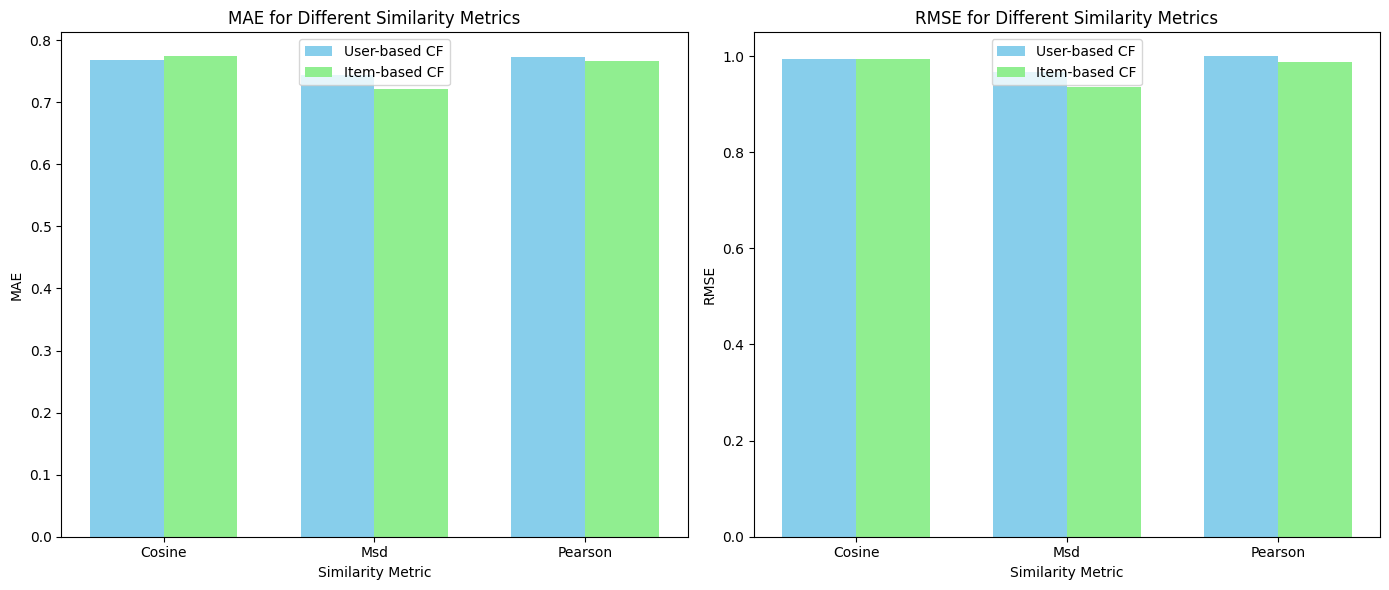

In [11]:

user_cf = results_df[results_df['Algorithm'] == 'User-based CF']
item_cf = results_df[results_df['Algorithm'] == 'Item-based CF']


x = np.arange(len(similarity_metrics))
width = 0.35


fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].bar(x - width/2, user_cf['MAE'], width, label='User-based CF', color='skyblue')
ax[0].bar(x + width/2, item_cf['MAE'], width, label='Item-based CF', color='lightgreen')
ax[0].set_xlabel('Similarity Metric')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE for Different Similarity Metrics')
ax[0].set_xticks(x)
ax[0].set_xticklabels([sim.capitalize() for sim in similarity_metrics])
ax[0].legend()


ax[1].bar(x - width/2, user_cf['RMSE'], width, label='User-based CF', color='skyblue')
ax[1].bar(x + width/2, item_cf['RMSE'], width, label='Item-based CF', color='lightgreen')
ax[1].set_xlabel('Similarity Metric')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE for Different Similarity Metrics')
ax[1].set_xticks(x)
ax[1].set_xticklabels([sim.capitalize() for sim in similarity_metrics])
ax[1].legend()

plt.tight_layout()
plt.show()


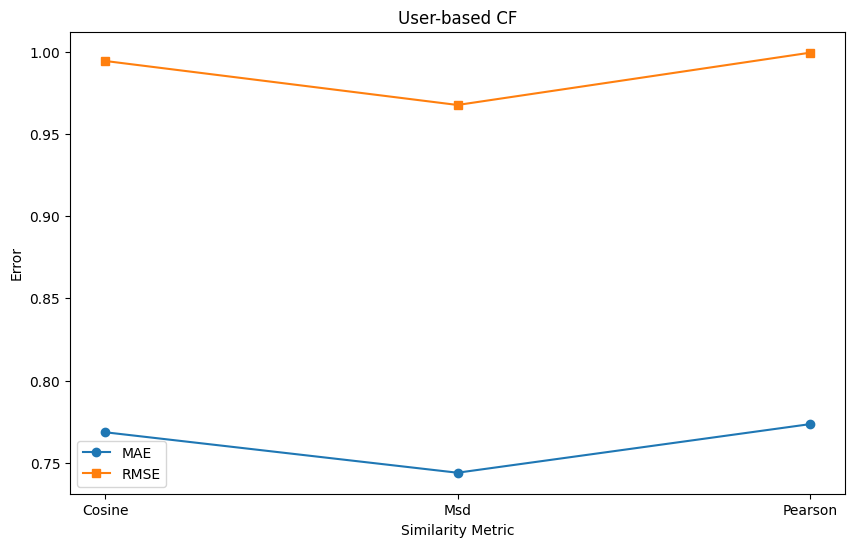

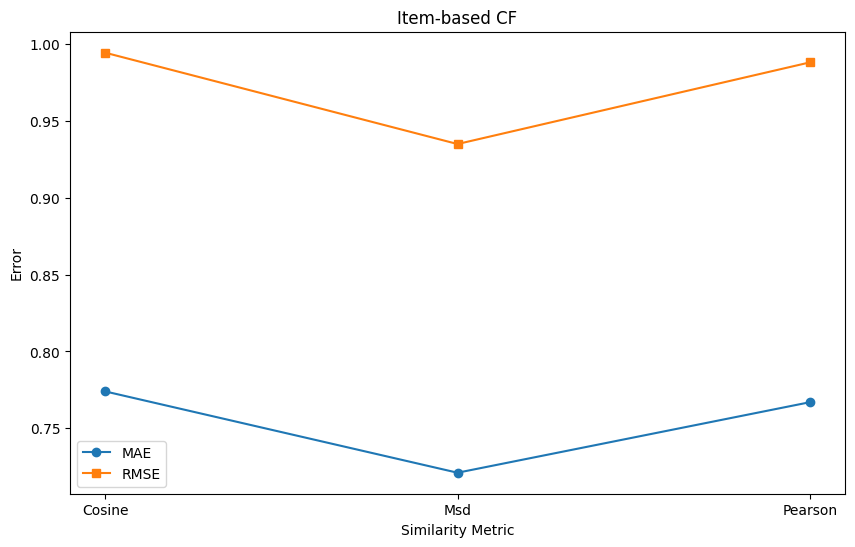

In [14]:
user_cf = results_df[results_df['Algorithm'] == 'User-based CF']
item_cf = results_df[results_df['Algorithm'] == 'Item-based CF']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(user_cf['Similarity'], user_cf['MAE'], marker='o', label='MAE')
plt.plot(user_cf['Similarity'], user_cf['RMSE'], marker='s', label='RMSE')
plt.xlabel('Similarity Metric')
plt.ylabel('Error')
plt.title('User-based CF')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(item_cf['Similarity'], item_cf['MAE'], marker='o', label='MAE')
plt.plot(item_cf['Similarity'], item_cf['RMSE'], marker='s', label='RMSE')
plt.xlabel('Similarity Metric')
plt.ylabel('Error')
plt.title('Item-based CF')
plt.legend()
plt.show()



In [23]:
results = {
    'K': [],
    'Algorithm': [],
    'MAE': [],
    'RMSE': []
}

k_values = range(1, 101, 5)  
sim_options = {'user_based': True}

In [25]:

sim_options_user = {'user_based': True}
sim_options_item = {'user_based': False}

for k in k_values:
    # User-based 
    algo_user = KNNBasic(k=k, sim_options=sim_options_user, verbose=False)
    cv_results_user = cross_validate(algo_user, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    mae_user = np.mean(cv_results_user['test_mae'])
    rmse_user = np.mean(cv_results_user['test_rmse'])
    results['K'].append(k)
    results['Algorithm'].append('User-based CF')
    results['MAE'].append(mae_user)
    results['RMSE'].append(rmse_user)
    
    # Item-based
    algo_item = KNNBasic(k=k, sim_options=sim_options_item, verbose=False)
    cv_results_item = cross_validate(algo_item, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    mae_item = np.mean(cv_results_item['test_mae'])
    rmse_item = np.mean(cv_results_item['test_rmse'])
    results['K'].append(k)
    results['Algorithm'].append('Item-based CF')
    results['MAE'].append(mae_item)
    results['RMSE'].append(rmse_item)



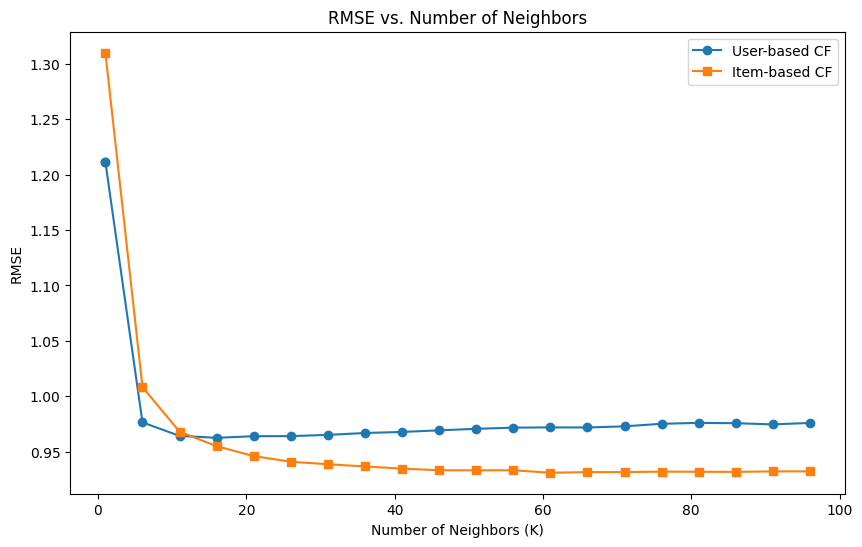

In [26]:
results_df = pd.DataFrame(results)
user_cf = results_df[results_df['Algorithm'] == 'User-based CF']
item_cf = results_df[results_df['Algorithm'] == 'Item-based CF']

plt.figure(figsize=(10, 6))
plt.plot(user_cf['K'], user_cf['RMSE'], marker='o', label='User-based CF')
plt.plot(item_cf['K'], item_cf['RMSE'], marker='s', label='Item-based CF')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Neighbors')
plt.legend()
plt.show()

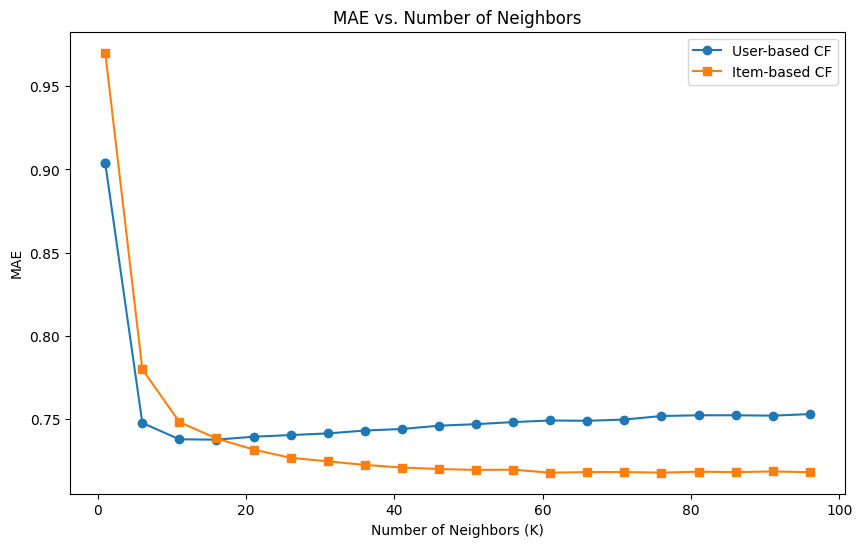

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(user_cf['K'], user_cf['MAE'], marker='o', label='User-based CF')
plt.plot(item_cf['K'], item_cf['MAE'], marker='s', label='Item-based CF')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('MAE')
plt.title('MAE vs. Number of Neighbors')
plt.legend()
plt.show()

In [28]:
# Find the row with the minimum RMSE 
optimal_user = user_cf.loc[user_cf['RMSE'].idxmin()]
print("Optimal K for User-based CF:")
print(optimal_user)

# Find the row with the minimum RMSE 
optimal_item = item_cf.loc[item_cf['RMSE'].idxmin()]
print("\nOptimal K for Item-based CF:")
print(optimal_item)



Optimal K for User-based CF:
K                       16
Algorithm    User-based CF
MAE               0.737398
RMSE              0.962447
Name: 7, dtype: object

Optimal K for Item-based CF:
K                       61
Algorithm    Item-based CF
MAE               0.717497
RMSE              0.930933
Name: 26, dtype: object
